In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math 
import pydicom


/home/adithya/anaconda3/envs/Major_Proj/lib/python3.9/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
from pydicom.pixel_data_handlers.util import apply_modality_lut


In [3]:
test_load_label = nib.load('../dataset/Healthy_Pancreas/TCIA_pancreas_labels-02-05-2017/label0012.nii.gz').get_fdata()
test_load_label.shape
slices = test_load_label.shape[2]

In [4]:
slices

214

In [5]:
def find_slice(slices,category):
    best = 0
    slice_no = 0
    for x in range(slices):
        mat = np.matrix(test_load_label[:, :, x])
        current = np.count_nonzero(mat == category)

        if current > best:
           
            best = current
            slice_no = x
    return slice_no

In [6]:
pancreas_best = find_slice(slices,1)
print(pancreas_best)

107


In [7]:
print(test_load_label[:, :, pancreas_best])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
non_zero_rows = test_load_label[~(test_load_label[:, :, pancreas_best] == 0).all(axis=1)]

# Print the rows with non-zero elements
# for row in non_zero_rows:
#     print(row)
len(non_zero_rows)

101

In [9]:
image = pydicom.dcmread("../dataset/Healthy_Pancreas/Pancreas-CT/PANCREAS_0015/11-24-2015-PANCREAS0015-Pancreas-30570/Pancreas-22230/1-012.dcm").pixel_array
path="dataset/Healthy_Pancreas/Pancreas-CT/PANCREAS_0008/11-24-2015-PANCREAS0008-Pancreas-75796/Pancreas-50363/1-004.dcm"
image.shape

(512, 512)

In [10]:
# image

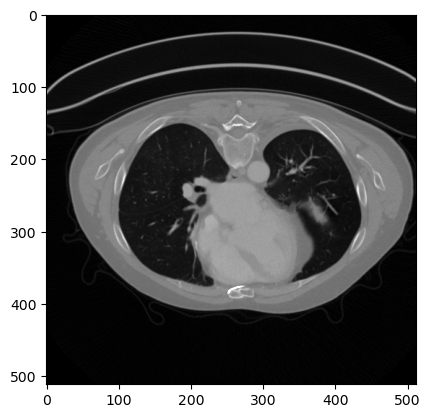

In [11]:
plt.imshow(image,cmap="gray",vmin=-1024,vmax=1023)
plt.show()

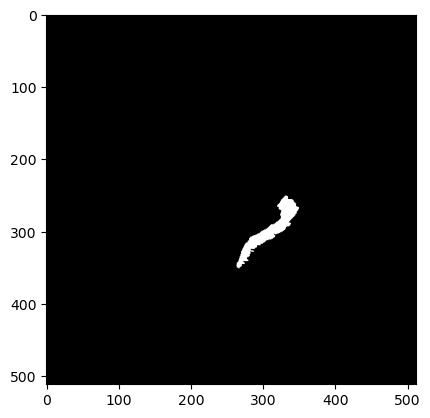

In [12]:
plt.imshow(test_load_label[:, :, pancreas_best],cmap="gray")
plt.show()

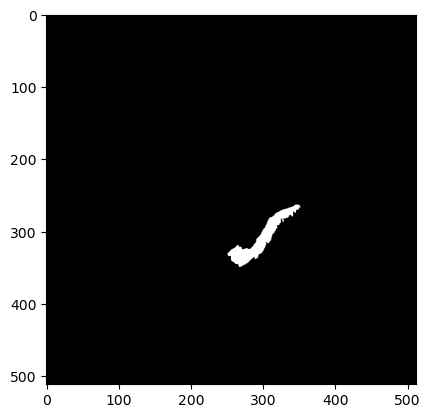

In [13]:
test_load_label[:, :, pancreas_best] = np.rot90(test_load_label[:, :, pancreas_best],k=1)
test_load_label[:, :, pancreas_best] = np.flip(test_load_label[:, :, pancreas_best],axis=0)
plt.imshow(test_load_label[:, :, pancreas_best],cmap="gray")
plt.show()

In [14]:
result = image*test_load_label[:,:,pancreas_best]
result[result == 0] = -1024.

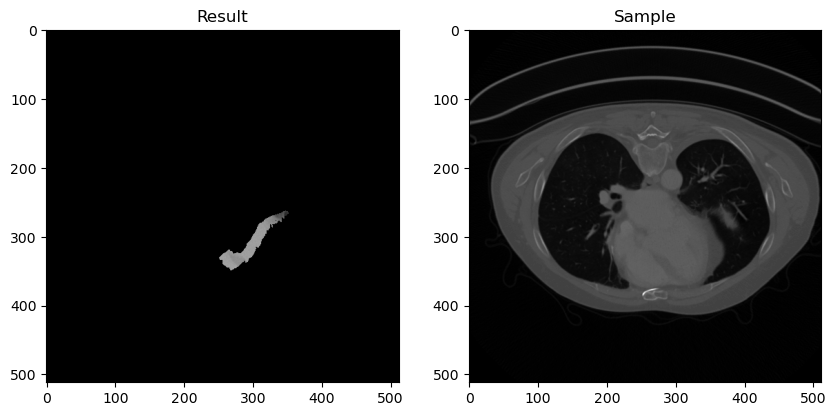

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(result, cmap="gray",vmin=-1024,vmax=1023)
plt.title("Result")

plt.subplot(1,2,2)
plt.imshow(image,cmap="gray")
plt.title("Sample")

plt.show()

In [4]:
# non_zero_rows = result[~(result == -1024.).all(axis=1)]

# # Print the rows with non-zero elements
# for row in non_zero_rows:
#     print(row)
# # len(non_zero_rows)

In [5]:
import os

In [18]:
path = "../dataset/Healthy_Pancreas/Pancreas-CT"
for i in os.listdir(path):
    print(i)
    j=i
    l=j.split("_")[1]
    print(l)



    

PANCREAS_0001
0001
PANCREAS_0002
0002
PANCREAS_0003
0003
PANCREAS_0004
0004
PANCREAS_0005
0005
PANCREAS_0006
0006
PANCREAS_0007
0007
PANCREAS_0008
0008
PANCREAS_0009
0009
PANCREAS_0010
0010
PANCREAS_0011
0011
PANCREAS_0012
0012
PANCREAS_0013
0013
PANCREAS_0014
0014
PANCREAS_0015
0015
PANCREAS_0016
0016
PANCREAS_0017
0017
PANCREAS_0018
0018
PANCREAS_0019
0019
PANCREAS_0020
0020
PANCREAS_0021
0021
PANCREAS_0022
0022
PANCREAS_0023
0023
PANCREAS_0024
0024
PANCREAS_0026
0026
PANCREAS_0027
0027
PANCREAS_0028
0028
PANCREAS_0029
0029
PANCREAS_0030
0030
PANCREAS_0031
0031
PANCREAS_0032
0032
PANCREAS_0033
0033
PANCREAS_0034
0034
PANCREAS_0035
0035
PANCREAS_0036
0036
PANCREAS_0037
0037
PANCREAS_0038
0038
PANCREAS_0039
0039
PANCREAS_0040
0040
PANCREAS_0041
0041
PANCREAS_0042
0042
PANCREAS_0043
0043
PANCREAS_0044
0044
PANCREAS_0045
0045
PANCREAS_0046
0046
PANCREAS_0047
0047
PANCREAS_0048
0048
PANCREAS_0049
0049
PANCREAS_0050
0050
PANCREAS_0051
0051
PANCREAS_0052
0052
PANCREAS_0053
0053
PANCREAS_005

In [6]:
import os

In [19]:
path = "../Segment_data/Healthy_pancreas/Pancreas_slice/"

for i in os.listdir(path):
    x=i.split('_')[2].split('.')[0]
    path_new="../dataset/Healthy_Pancreas/TCIA_pancreas_labels-02-05-2017/"+"label"+f"{x}.nii.gz"
    test_load = pydicom.dcmread(path+i).pixel_array

    test_load_label=nib.load(path_new).get_fdata()
    slices = test_load_label.shape[2]
    pancreas_best = find_slice(slices,1)
    test_load_label[:, :, pancreas_best] = np.rot90(test_load_label[:, :, pancreas_best],k=1)
    test_load_label[:, :, pancreas_best] = np.flip(test_load_label[:, :, pancreas_best],axis=0)
    result = test_load * test_load_label[:,:,pancreas_best]
    result[result == 0] = -1024.
    y = i.split('.')[0]


    print(y)

    break

pancreas_healthy_0001


In [20]:
label=pydicom.dcmread("../Segment_data/Healthy_pancreas/Mask/pancreas_healthy_0061.dcm").pixel_array
slice=pydicom.dcmread("../Segment_data/Healthy_pancreas/Pancreas_slice/pancreas_healthy_0061.dcm").pixel_array
result=pydicom.dcmread("../Segment_data/Healthy_pancreas/Result/pancreas_healthy_0061.dcm").pixel_array



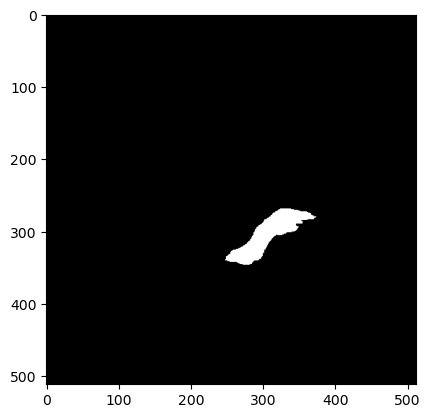

In [21]:
plt.imshow(label,cmap="gray")

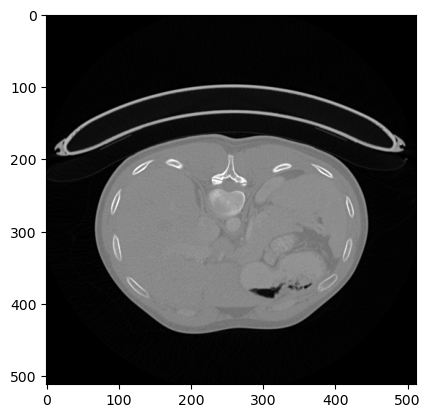

In [22]:
plt.imshow(slice,cmap="gray",vmin=-1024.,vmax=1023)

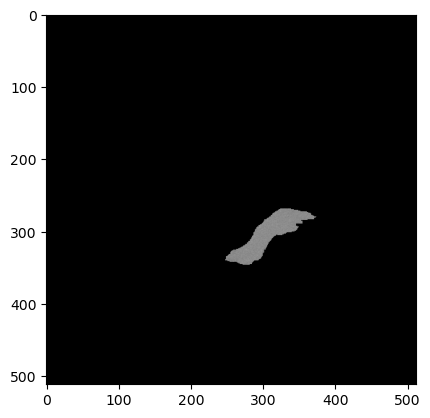

In [23]:
plt.imshow(result,cmap="gray",vmin=-1024.,vmax=1023)